In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

# import API key
from api_keys import api_key

# use citipy to get city names from lat and long values
from citipy import citipy

In [2]:
# generate the latitude and longitude
n_cities = 1500
lat = np.random.uniform(low=-90.000, high=90.000, size=n_cities)
lng = np.random.uniform(low=-180.000, high=180.000, size=n_cities)

In [3]:
cities_list = []
for i in range(n_cities):
    city = citipy.nearest_city(lat[i], lng[i]).city_name
    
    # check if the city already exists in the list
    if city not in cities_list:
        cities_list.append(city)

In [4]:
len(cities_list)

617

## Perform API Calls

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# create a list to store city weather data
city_data = []

for city in cities_list:
    try:
        # perform the api call
        city_weather = requests.get(url + "&q=" + city).json()
        
        # parse the information from the API call
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        #city_humidity = city_weather["main"]["humidity"]
        ##city_cloudiness = city_weather["main"][""]
        #city_wind_speed = city_weather["wind"{speed}]
        
        # append the city
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp})
    except:
        # if city data does not exist in the API
        print("City not found, skipping.... " + city)
        pass

City not found, skipping.... bur gabo
City not found, skipping.... tsihombe
City not found, skipping.... sinkat
City not found, skipping.... bengkulu
City not found, skipping.... karaul
City not found, skipping.... lolua
City not found, skipping.... barentsburg
City not found, skipping.... sentyabrskiy
City not found, skipping.... kazalinsk
City not found, skipping.... bacuit
City not found, skipping.... illoqqortoormiut
City not found, skipping.... grand river south east
City not found, skipping.... maarianhamina
City not found, skipping.... urucurituba
City not found, skipping.... mys shmidta
City not found, skipping.... kapoeta
City not found, skipping.... muzquiz
City not found, skipping.... taolanaro
City not found, skipping.... bokspits
City not found, skipping.... amderma
City not found, skipping.... galiwinku
City not found, skipping.... kamenskoye
City not found, skipping.... tambul
City not found, skipping.... litoral del san juan
City not found, skipping.... barawe
City not 

In [13]:
#city_data
city_weather

{'coord': {'lon': 102.19, 'lat': 38.52},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 61.07,
  'pressure': 807.59,
  'humidity': 100,
  'temp_min': 61.07,
  'temp_max': 61.07,
  'sea_level': 1019.55,
  'grnd_level': 807.59},
 'wind': {'speed': 3.91, 'deg': 59.0046},
 'rain': {'3h': 0.4},
 'clouds': {'all': 88},
 'dt': 1535611508,
 'sys': {'message': 0.0035,
  'country': 'CN',
  'sunrise': 1535582316,
  'sunset': 1535629471},
 'id': 1805733,
 'name': 'Jinchang',
 'cod': 200}

In [9]:
# convert to dataframe
city_df = pd.DataFrame(city_data)
city_df

,City,Lat,Lng,Max Temp
0,carnarvon,-30.97,22.13,45.86
1,valdez,61.13,-146.35,50.00
2,albany,42.65,-73.75,73.04
3,severo-kurilsk,50.68,156.12,53.96
4,celina,40.55,-84.57,69.98
5,visby,57.64,18.30,59.00
6,cape town,-33.93,18.42,53.60
7,rikitea,-23.12,-134.97,67.10
8,nanortalik,60.14,-45.24,41.00
9,hithadhoo,-0.60,73.08,84.20


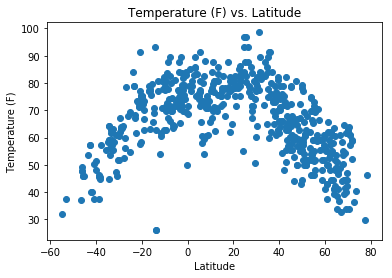

In [11]:
# plot Temperature (F) vs. Latitude

# lat vs temp, lat vs windspeed ...

plt.scatter(city_df['Lat'],city_df['Max Temp'])
plt.title(f"Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.style.use('ggplot')
#plt.savefig("temp vs lat")
plt.show()

In [40]:
city_weather["coord"]

{'cod': '404', 'message': 'city not found'}

In [44]:
sample = city_weather.json()

In [45]:
sample

{'coord': {'lon': 9.49, 'lat': 46.33},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 53.82,
  'pressure': 1019,
  'humidity': 69,
  'temp_min': 39.2,
  'temp_max': 60.8},
 'visibility': 10000,
 'wind': {'speed': 3.36},
 'clouds': {'all': 0},
 'dt': 1535311200,
 'sys': {'type': 1,
  'id': 6020,
  'message': 0.0041,
  'country': 'IT',
  'sunrise': 1535258130,
  'sunset': 1535307053},
 'id': 3178829,
 'name': 'Canete',
 'cod': 200}

In [48]:
sample["coord"]["lat"]

46.33

In [49]:
sample["coord"]["lon"]

9.49

In [52]:
sample["weather"][0]["description"]

'clear sky'